In [1]:
import pydub
import matplotlib.pyplot as plt
import os

before we feed data into NN we should preproccess them 
1_ we should concat all voices of each person , and make just one voice for each person .
2_ we sholud equalize different files suffixes
3_ we should ommit silent parts in audios . bc these parts are the same for all persons .
هوش مصنوعی باید با شندین زمان کمی از صدای افراد ، صاحب اون صدا رو تشخیص بده و نیازی به کل دو دقیقه نیست پس باید هر ویس را به تیکه های یک ثانیه ای تقسیم کنیم . تا حتی با گرفتن یک وویس ۵ ثانیه ای هم اون فرد رو درجا بشناسه 

## merge same users voices and convert them into one 

In [4]:
# concat 2 voices
voice_1 = pydub.AudioSegment.from_file("singers_vocal/chaartar_1.wav")
voice_2 = pydub.AudioSegment.from_file("singers_vocal/chaartar_2.wav")

result  = voice_1 + voice_2
f_result = result.export("data/chaartar.wav")

In [5]:
# concat 2 voices
voice_1 = pydub.AudioSegment.from_file("singers_vocal/chavoshi_1.wav")
voice_2 = pydub.AudioSegment.from_file("singers_vocal/chavoshi_2.wav")

result  = voice_1 + voice_2
f_result = result.export("data/chavoshi.wav")

In [6]:
# concat 2 voices
voice_1 = pydub.AudioSegment.from_file("singers_vocal/sirvan_1.wav")
voice_2 = pydub.AudioSegment.from_file("singers_vocal/sirvan_2.wav")

result  = voice_1 + voice_2
f_result = result.export("data/sirvan.wav")

In [7]:
# concat 2 voices
voice_1 = pydub.AudioSegment.from_file("singers_vocal/xaniar_1.wav")
voice_2 = pydub.AudioSegment.from_file("singers_vocal/xaniar_2.wav")

result  = voice_1 + voice_2
f_result = result.export("data/xaniar.wav")

In [8]:
# concat 2 voices
voice_1 = pydub.AudioSegment.from_file("singers_vocal/yegane_1.wav")
voice_2 = pydub.AudioSegment.from_file("singers_vocal/yegane_2.wav")

result  = voice_1 + voice_2
f_result = result.export("data/yegane.wav")

<class 'pydub.audio_segment.AudioSegment'>
<class 'array.array'>


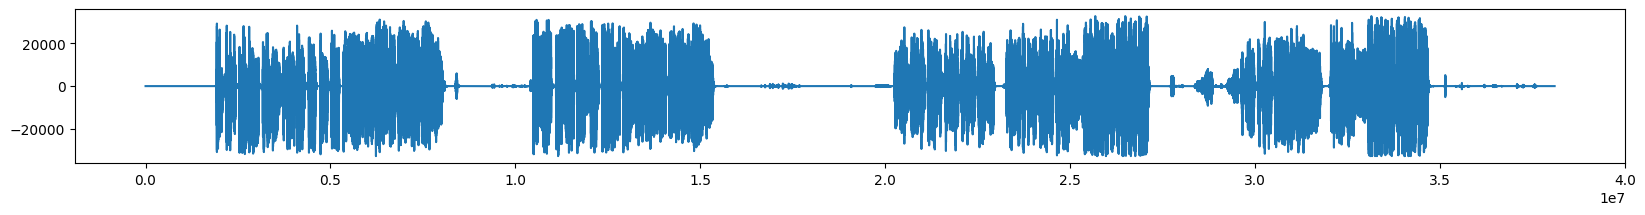

In [16]:
# plot voices 
voice_1 = pydub.AudioSegment.from_file("data/chavoshi.wav")
print(type(voice_1)) # its an object from AudioSegment class

# we cant give AudioSegment object to matplotlib to plot it , bc it gets numpy array like
voice_2 = voice_1.get_array_of_samples()
print(type(voice_2))

plt.figure(figsize=(20,2))
plt.plot(voice_2)
plt.show()

# omit silent parts in files :

In [10]:
os.listdir("data")

['chaartar.wav', 'chavoshi.wav', 'sirvan.wav', 'xaniar.wav', 'yegane.wav']

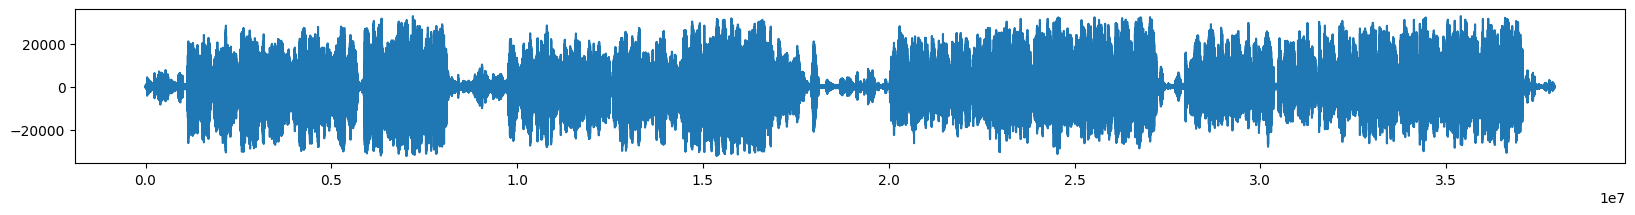

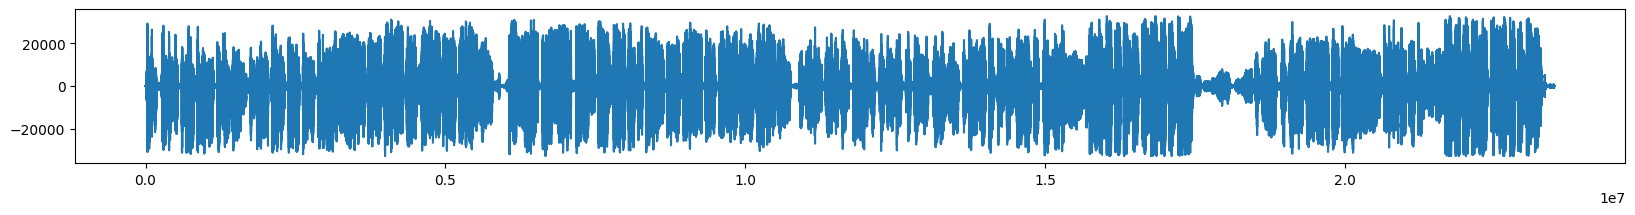

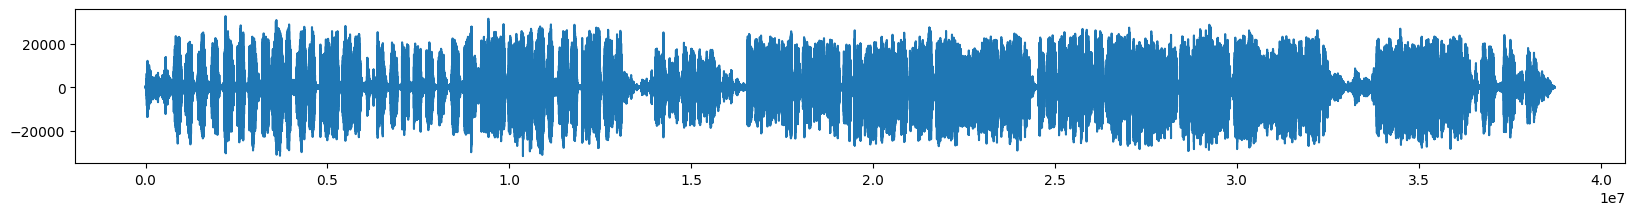

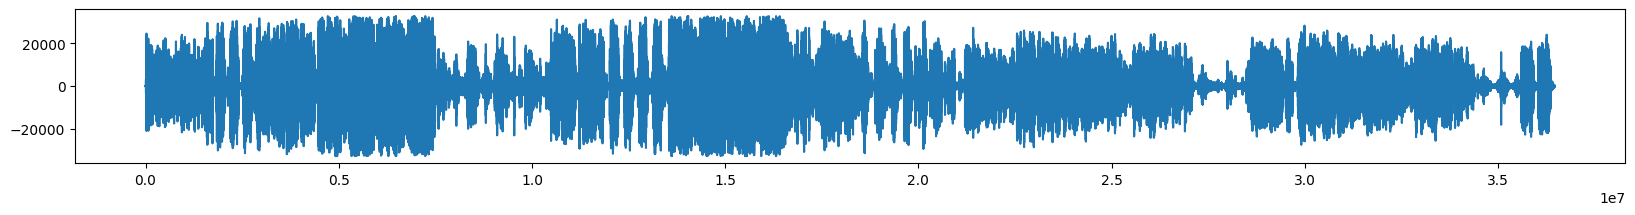

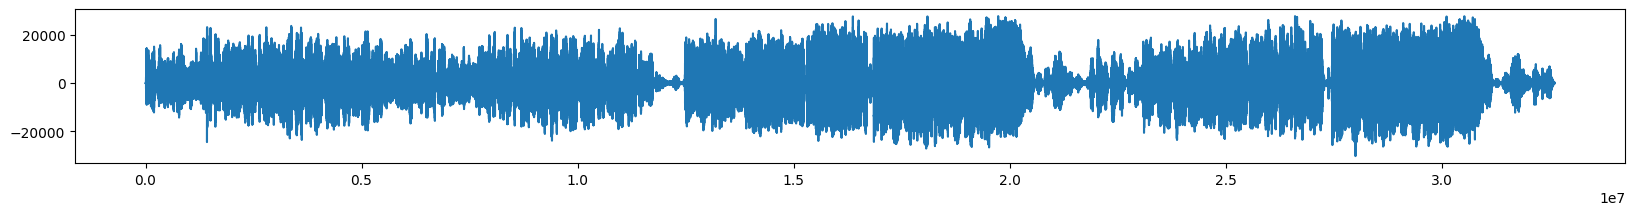

In [18]:
for file in os.listdir("data"):

    audio = pydub.AudioSegment.from_file(os.path.join("data" , file))
    audio_array = audio.get_array_of_samples()
    
    
    silent_chunks = pydub.silence.split_on_silence(audio , min_silence_len=100 , silence_thresh=-50) 
    result = sum(silent_chunks)
    #file_name = file.split(".")[0]
    audio_array = result.get_array_of_samples()

    plt.figure(figsize=(20,2))
    plt.plot(audio_array)
    plt.show()    
    result.export("wav_data/"+ file)


## convert each audio file , into 1 second files 
--> export them into dataset folder 

In [19]:
for file in os.listdir("wav_data"):

    audio = pydub.AudioSegment.from_file(os.path.join("wav_data" , file))

    chunks = pydub.utils.make_chunks(audio , 1000)

    # create a folder for each person
    person_name = file.split(".")[0]
    os.makedirs(os.path.join("dataset" , person_name) , exist_ok=True)

    for i , chunk in enumerate(chunks) :
        
        if len(chunk) >= 1000 : # if len chunk is more than 1 second
            chunk.export(os.path.join("dataset" , person_name , f"voice_{i}.wav") , format="wav")# create a folder for each person in dataset folder , and create many 1 sec voice_i.wav

